In [4]:
import joblib
dataset= joblib.load(r'C:\Users\MAJID KHAN\Data Science\Projects\CreditCard Fraud\Data\processed_data.pkl')


In [6]:
dataset.head(5)

,V17,V14,V12,V10,V3,V16,V7,V11,V4,V18,Scaled_Amount,Class
0,0.207971,-0.311169,-0.617801,0.090794,2.536347,-0.470401,0.239599,-0.551600,1.378155,0.025791,1.731174,0.0
1,-0.114805,-0.143772,1.065235,-0.166974,0.166480,0.463917,-0.078803,1.612727,0.448154,-0.183361,-0.276889,0.0
2,1.109969,-0.165946,0.066084,0.207643,1.773209,-2.890083,0.791461,0.624501,0.379780,-0.121359,4.861419,0.0
3,-0.684093,-0.287924,0.178228,-0.054952,1.792993,-1.059647,0.237609,-0.226487,-0.863291,1.965775,1.374197,0.0
4,-0.237033,-1.119670,0.538196,0.753074,1.548718,-0.451449,0.592941,-0.822843,0.403034,-0.038195,0.642886,0.0


<Figure size 3000x2000 with 0 Axes>

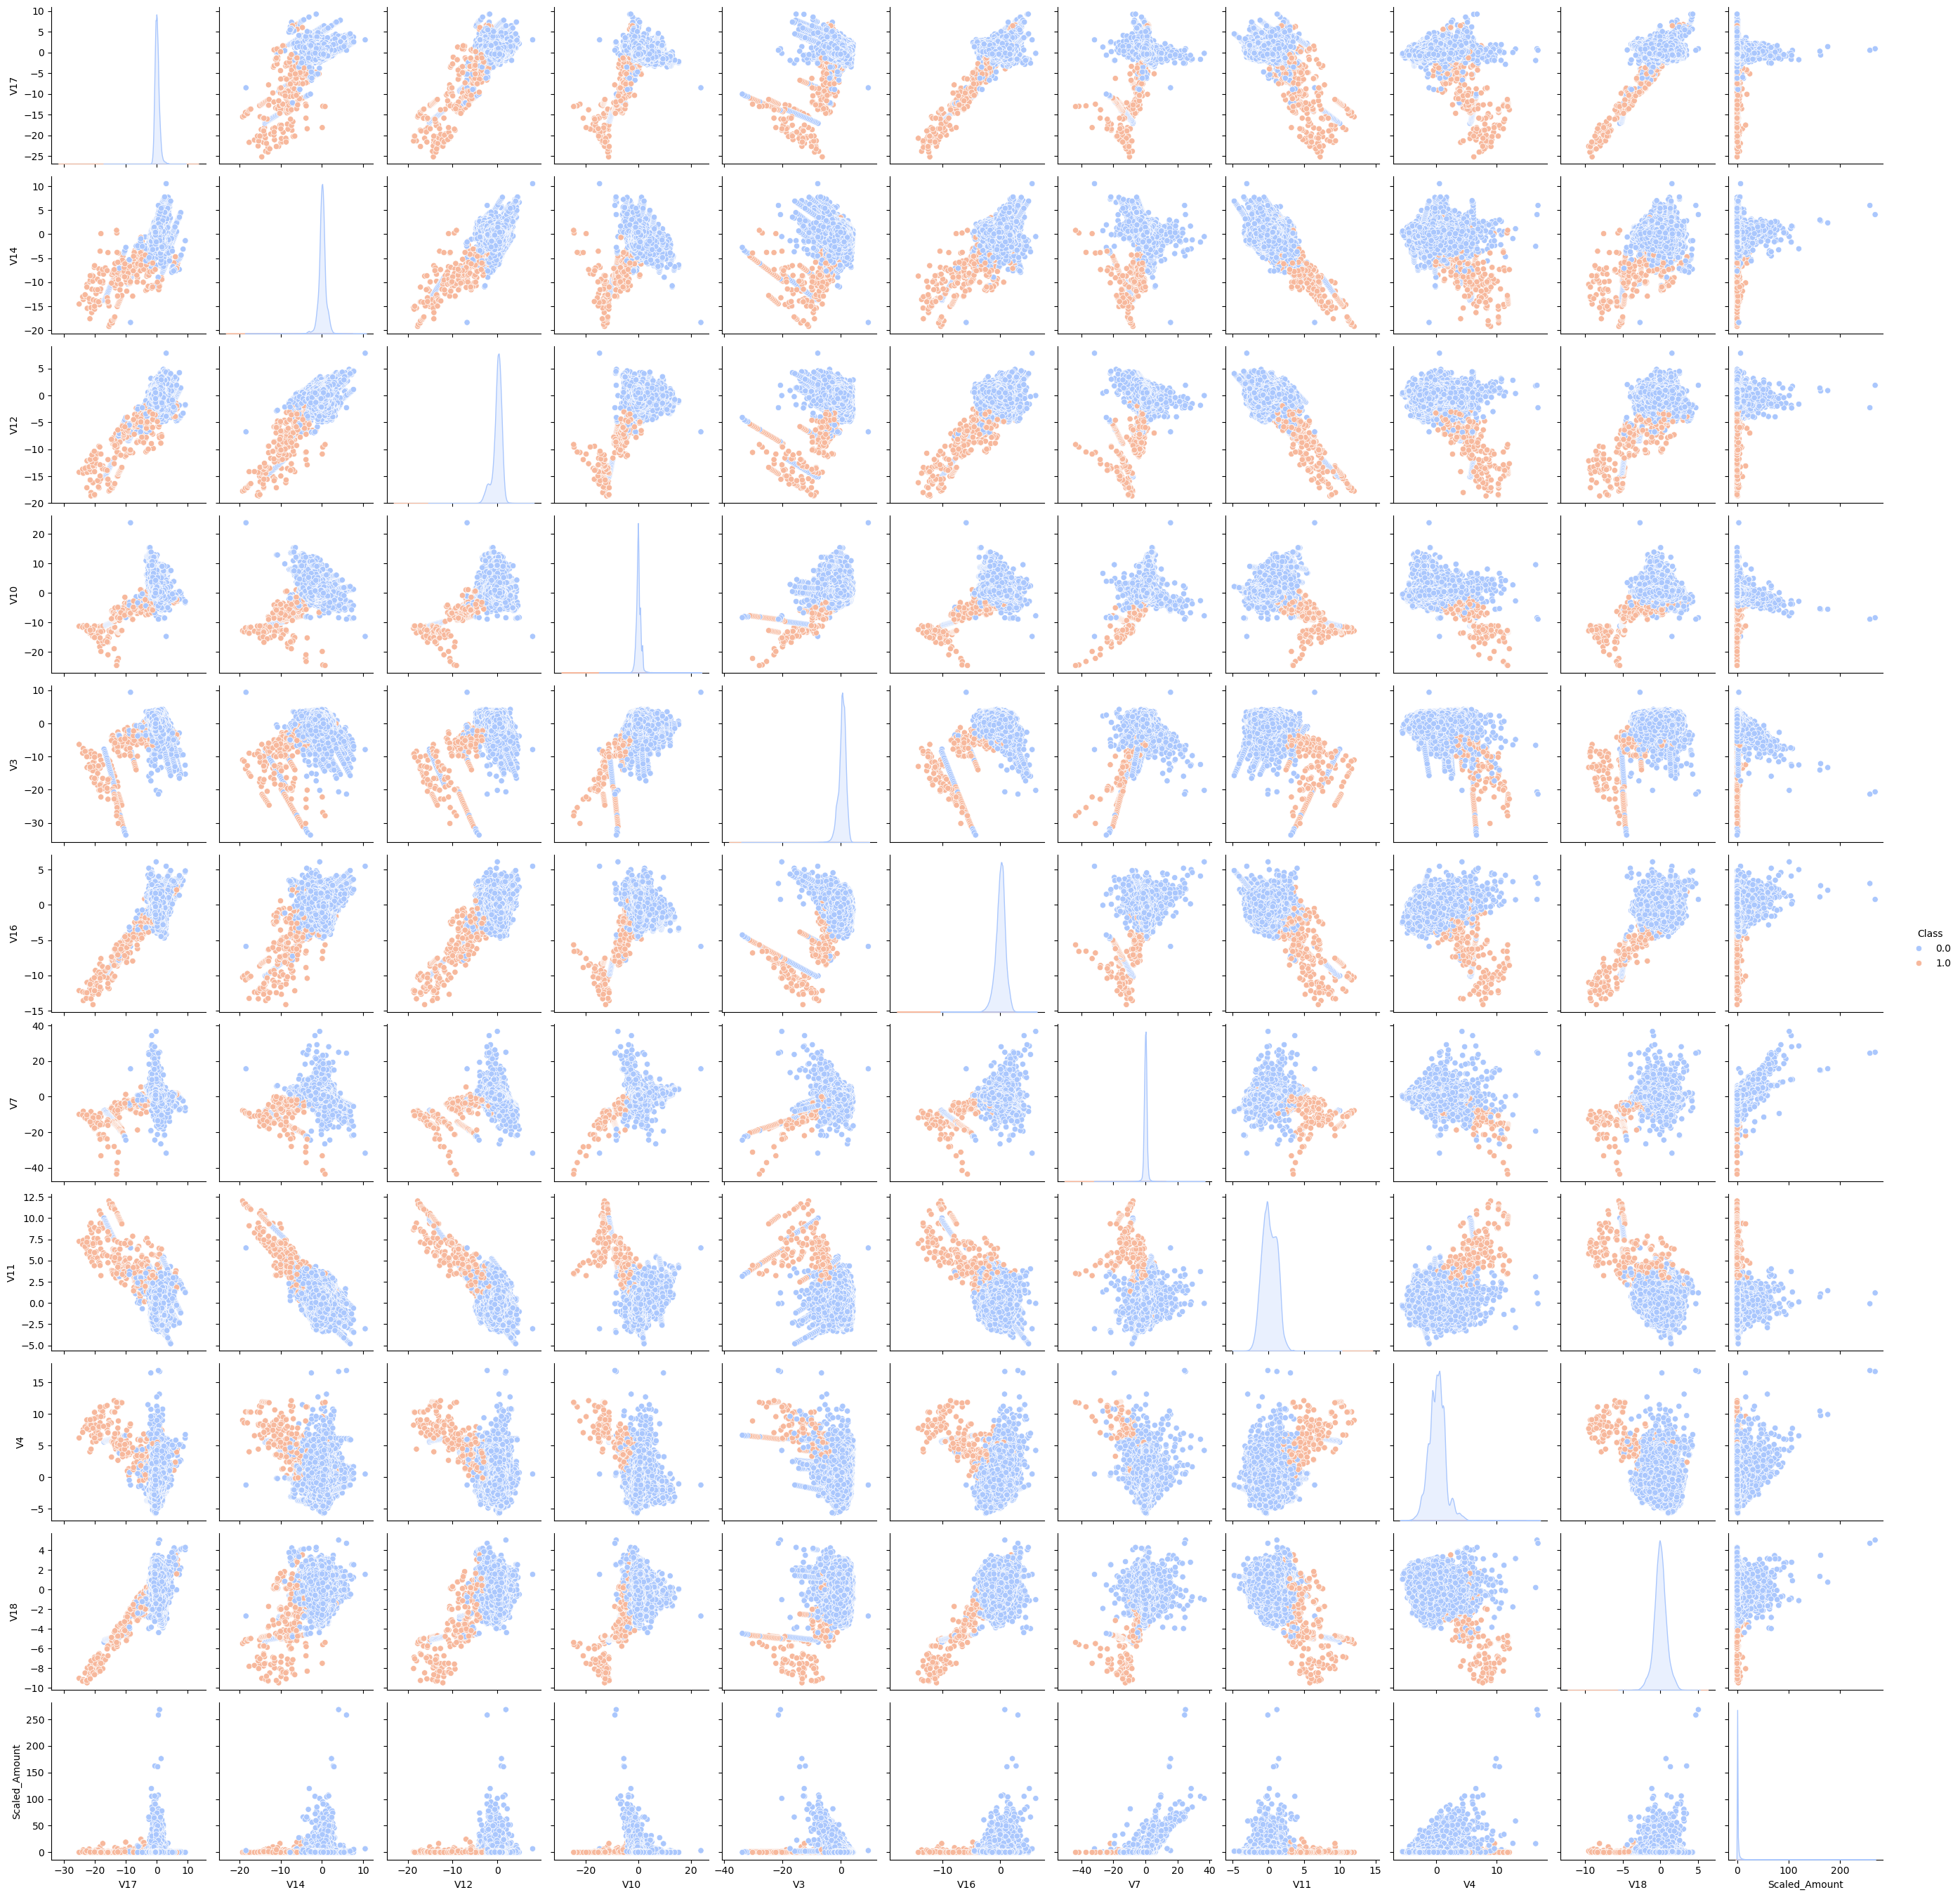

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,20))
sns.pairplot(dataset, hue='Class', palette='coolwarm')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, f1_score

In [14]:
X= dataset.iloc[:,:-1]
y=dataset['Class']

In [15]:
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42, stratify=y) 

In [16]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((154791, 11), (154791,), (38698, 11), (38698,))

In [17]:
# Oversampling

**❓Why Not Oversample Only the Class Feature?**
- Because the goal of oversampling is not to just increase the number of “fraud” labels (i.e., the Class column)…
- 🔁 It's to create new full data points (rows) where features and labels are both synthetic and realistic.

**✅ Why Oversample Only Training Data?**
- If you apply SMOTE (or any resampling) before splitting:
- The synthetic fraud samples will leak into your test set.
- This will cause data leakage, giving you an unrealistically high score.
- Your model won’t generalize well to real, unseen fraud.

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
sampling= SMOTE(random_state=42)

In [21]:
x_train_res, y_train_res= sampling.fit_resample(x_train,y_train)

In [22]:
# modeling using Logistic Regression

In [23]:
model_lr = LogisticRegression()

In [24]:
model_lr.fit(x_train_res,y_train_res)

LogisticRegression()

In [25]:
# Using XGBoost model

In [26]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- XGBoost Model ---
# scale_pos_weight = ratio of negative to positive samples
# (Helps with imbalanced fraud detection datasets)
scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])

model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_estimators=200,
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.1,
    max_depth=7,
    subsample= 1.0
)

# Train the model
model_xgb.fit(x_train, y_train)

# Predictions of test
y_pred = model_xgb.predict(x_test)
y_pred_proba = model_xgb.predict_proba(x_test)[:, 1]  # Probabilities for ROC AUC

# --- Evaluation Metrics  of Test---
print('Testing Result')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Predictions of train
y_pred_1 = model_xgb.predict(x_train)
y_pred_proba_1 = model_xgb.predict_proba(x_train)[:, 1]  # Probabilities for ROC AUC

# --- Evaluation Metrics  of Train---
print('Training Result')
print("Accuracy:", accuracy_score(y_train, y_pred_1))
print("Precision:", precision_score(y_train, y_pred_1))
print("Recall:", recall_score(y_train, y_pred_1))
print("F1 Score:", f1_score(y_train, y_pred_1))
print("ROC AUC:", roc_auc_score(y_train, y_pred_proba_1))




Testing Result
Accuracy: 0.9996123830688924
Precision: 0.9027777777777778
Recall: 0.8904109589041096
F1 Score: 0.896551724137931
ROC AUC: 0.9856225561909828

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38625
         1.0       0.90      0.89      0.90        73

    accuracy                           1.00     38698
   macro avg       0.95      0.95      0.95     38698
weighted avg       1.00      1.00      1.00     38698

Training Result
Accuracy: 0.9999030951411904
Precision: 0.9508196721311475
Recall: 1.0
F1 Score: 0.9747899159663865
ROC AUC: 0.9999925790012741


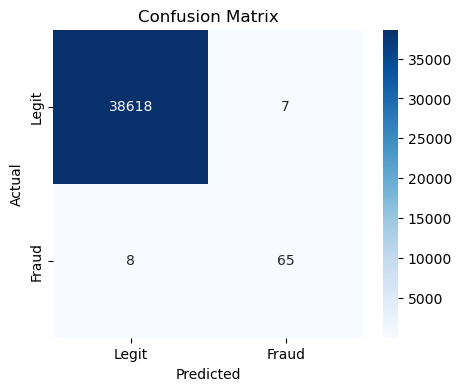

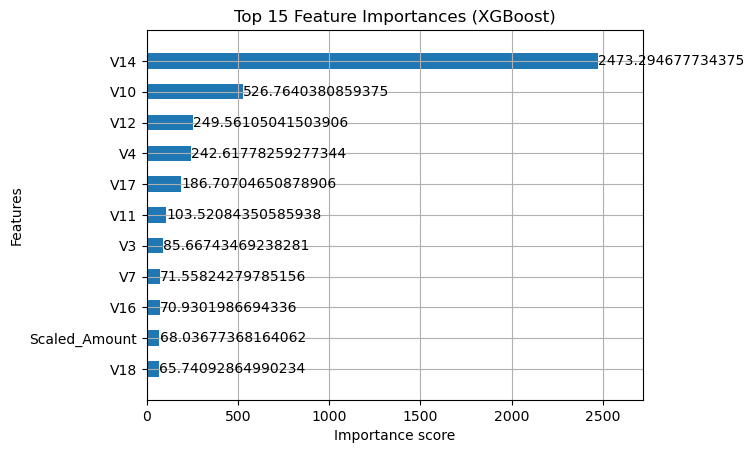

          Feature  Importance
1             V14    0.596780
3             V10    0.127103
2             V12    0.060216
8              V4    0.058541
0             V17    0.045050
7             V11    0.024978
4              V3    0.020671
6              V7    0.017266
5             V16    0.017115
10  Scaled_Amount    0.016417
9             V18    0.015863


In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# --- Feature Importance ---
xgb.plot_importance(model_xgb, max_num_features=15, importance_type='gain', height=0.5)
plt.title("Top 15 Feature Importances (XGBoost)")
plt.show()

# Extract feature importance values
feature_importance = model_xgb.feature_importances_
feature_names = x_train.columns

import pandas as pd
importances_df = (
    pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
      .sort_values(by='Importance', ascending=False)
)
print(importances_df.head(15))  # Top 15 features

## 📊 Comparison Table
|Metric	|Before Oversampling	|After Oversampling|
|-------|-----------------------|------------------|
|Class 0 (Legit) Precision	|0.9992	|0.9999 ✅
|Class 0 (Legit) Recall	|0.9998 ✅	|0.9744 ⬇️
|Class 1 (Fraud) Precision	|0.8571 ✅	|0.0645 ⬇️
|Class 1 (Fraud) Recall	|0.5753 ⬇️	|0.9315 ✅⬆️
|Accuracy	|0.9990 ✅	|0.9744 ⬇️
|Macro Avg F1	|0.8440 ✅	|0.5538 ⬇️

### 🧠 What’s Happening?
**🧪 BEFORE Oversampling:**

Your model is trained on the original, imbalanced dataset:

- Legit (Class 0): 99.8% of data
- Fraud (Class 1): ~0.2%

So:

- Model is heavily biased toward Class 0
- High accuracy (99.9%) is misleading
- Only catches ~57% of frauds (recall = 0.5753)
- Precision for frauds is good (0.8571), but misses many actual frauds

**🧪 AFTER Random Oversampling:**

You've duplicated the minority (fraud) class in the training set to make it balanced.

Now:

- Model is forced to learn what frauds look like
- Recall improves dramatically (now catches 93% of frauds ✅)
- But precision drops sharply to 0.0645 — means many false positives
- Model is overpredicting frauds, labeling too many legit transactions as fraud

**🚦 So… Which One Is Better?**
It depends on business goals:

|Scenario	|Focus	|Recommended|
|-----------|-------|-----------|
|💳 Credit Card Company	 |Catch as many frauds as possible	|✅ High recall is crucial → Accept oversampling and false positives
|⚖️ Legal Risk or Costly Investigations	 |Avoid false accusations	|✅ Higher precision is needed → May prefer original model or tune threshold



## **🔁 ROS (Random Over Sampling)** vs **🧬 SMOTE (Synthetic Minority Over-sampling Technique)**

| Feature                 | Random OverSampling (ROS)                               | SMOTE (Synthetic Minority Over-sampling Technique)      |
| ----------------------- | ------------------------------------------------------- | ------------------------------------------------------- |
| **Method**              | Randomly **duplicates existing** minority class samples | Generates **new synthetic samples** from minority class |
| **Risk of Overfitting** | ✅ **High** — duplicates same rows again and again       | 🚫 **Lower** — generates diverse synthetic samples      |
| **Data Distribution**   | ❌ Doesn't expand the feature space                      | ✅ Interpolates new data along feature space vectors     |
| **Sample Diversity**    | ❌ Low — same points repeated                            | ✅ High — new data points created using neighbors        |
| **Runtime Speed**       | ✅ Fast (just copy rows)                                 | ⚠️ Slower (calculates neighbors, interpolation)         |
| **Works Well When...**  | Quick baseline, tiny datasets                           | When synthetic realism and generalization are needed    |
| **Downside**            | Overfits quickly, not generalizable                     | Can produce noise if outliers exist in minority class   |

---

### ROS
```yaml
🟦 Legit Samples
🔴 Fraud Samples

After ROS:
Same 🔴 copied again and again

🟦 🟦 🟦 🟦 🟦
🔴 🔴 🔴 🔴 🔴 🔴 🔴 🔴
```
---

### SMOTE
```yaml
🟦 Legit
🔴 Fraud
🟠 Synthetic Fraud

SMOTE adds new points 'between' real frauds:
🟦 🟦 🟦 🟦 🟦
🔴 🟠 🔴 🟠 🔴
```
---

## Evaluation

In [28]:
# Logistic Regression

In [29]:
y_predict= model_lr.predict(x_test)

### Before OverSampling: 

                  **precision    recall  f1-score   support**

         **0.0**     0.9992    0.9998    0.9995     38625  ✅ Legitimate
         **1.0**     0.8571    0.5753    0.6885        73  ⚠️ Fraud

    accuracy                         0.9990     38698
   macro avg     0.9282    0.7876    0.8440     
weighted avg     0.9989    0.9990    0.9989     


In [31]:
print("🔍 Logistic Regression Report: AFTER OverSampling")
print(classification_report(y_test, y_predict, digits=4))

🔍 Logistic Regression Report: AFTER OverSampling
              precision    recall  f1-score   support

         0.0     0.9998    0.9735    0.9865     38625
         1.0     0.0614    0.9178    0.1151        73

    accuracy                         0.9734     38698
   macro avg     0.5306    0.9456    0.5508     38698
weighted avg     0.9981    0.9734    0.9848     38698



In [32]:
model_lr.score(x_test,y_test)*100, model_lr.score(x_train_res,y_train_res)*100

(97.33836373972815, 93.63499265376923)

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [35]:
# for Logistic Regression

In [36]:
cm_lr= confusion_matrix(y_test,y_predict)

In [37]:
cm_lr

array([[37601,  1024],
       [    6,    67]], dtype=int64)

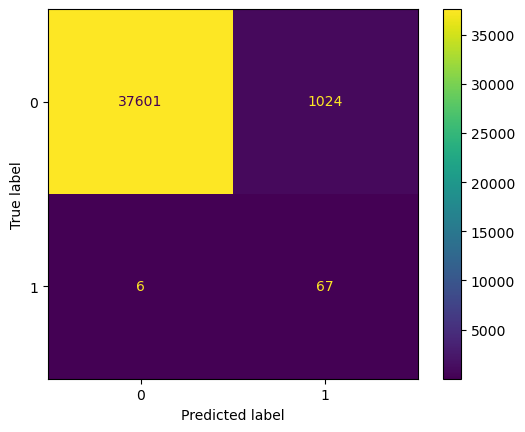

In [38]:
disp_lr= ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()

In [40]:
# for Random Forest

In [41]:
# cm_rf= confusion_matrix(y_test,y_predict_2)

In [42]:
# cm_rf

In [43]:
# disp_rf= ConfusionMatrixDisplay(confusion_matrix=cm_rf)
# disp_rf.plot()

## ✅ Let’s Compute Key Metrics for Both
| Metric                   | Logistic Regression           | Random Forest              |
| ------------------------ | ----------------------------- | -------------------------- |
| **True Positives (TP)**  | 67 (frauds caught)            | 62 (frauds caught)         |
| **False Negatives (FN)** | 6 (frauds missed)             | 11 (frauds missed)         |
| **False Positives (FP)** | 1024 (legits wrongly flagged) | 2 (legits wrongly flagged) |
| **True Negatives (TN)**  | 37601                         | 38623                      |

---
## 🧠 Evaluation: What Matters Most in Fraud Detection?
| Metric              | Why it matters                                | Best Model                               |
| ------------------- | --------------------------------------------- | ---------------------------------------- |
| **Recall (TPR)**    | Find as many frauds as possible               | **Logistic Regression (67/73 = 0.9178)** |
| **Precision**       | Reduce false alarms (don’t annoy legit users) | **Random Forest (62 / 64 = 0.968)**      |
| **False Positives** | Important to reduce customer complaints       | ✅ Random Forest                          |
| **False Negatives** | Critical — missed frauds = lost money         | ✅ Logistic Regression                    |

---
## 🎯 Summary
| Aspect                       | Logistic Regression  | Random Forest       |
| ---------------------------- | -------------------- | ------------------- |
| **Catches more frauds**      | ✅ Yes (67/73)        | No (62/73)          |
| **Misses fewer frauds**      | ✅ Fewer FN (6)       | More FN (11)        |
| **Raises more false alarms** | ❌ 1024 legit flagged | ✅ Only 2 flagged    |
| **Better Precision**         | ❌ (67 / 1091 ≈ 6%)   | ✅ (62 / 64 ≈ 96.8%) |
| **Better Recall**            | ✅ 91.8%              | 84.9%               |

---
## ✅ Verdict

**👉 If your goal is to minimize missing any fraud (high recall):**
✔️ Choose Logistic Regression

- It catches more frauds (6 missed vs 11).
- Acceptable for sensitive environments (e.g., banks, security systems).

**👉 If your goal is to avoid false accusations (high precision):**
✔️ Choose Random Forest

- Only 2 legitimate users wrongly flagged — excellent precision.
- Better customer experience, fewer false alerts.

In [45]:
y_prob_lr = model_lr.predict_proba(x_test)[:, 1]
# y_prob_rf = model_rf.predict_proba(x_test)[:, 1]
y_prob_xgb= model_xgb.predict_proba(x_test)[:,1]

# Apply tuned thresholds
y_prob_lr = (y_prob_lr >= 0.05).astype(int)      # t1
y_prob_xgb = (y_prob_xgb >= 0.45).astype(int)    # t2

# Dual decision: fraud if BOTH say fraud
final_preds = ((y_prob_lr == 1) & (y_prob_xgb == 1)).astype(int)


from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, final_preds))
print(confusion_matrix(y_test, final_preds))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38625
         1.0       0.89      0.90      0.90        73

    accuracy                           1.00     38698
   macro avg       0.95      0.95      0.95     38698
weighted avg       1.00      1.00      1.00     38698

[[38617     8]
 [    7    66]]


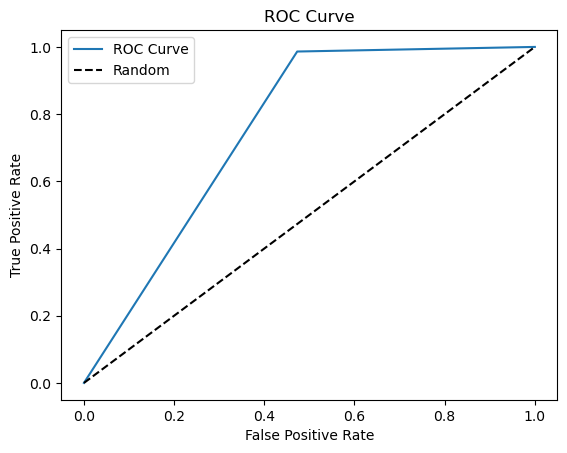

AUC Score: 0.7566846655140312
✅ AUC closer to 1 means better separability between fraud and legit.


In [46]:
# for LR
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test, y_prob_lr)
print("AUC Score:", auc_score)

print("✅ AUC closer to 1 means better separability between fraud and legit.")

In [47]:
# for LR

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("F1-score:", f1_score(y_test, y_predict))


Accuracy: 0.9733836373972815
Precision: 0.0614115490375802
Recall: 0.9178082191780822
F1-score: 0.11512027491408934


In [49]:
# For XGBooost model

In [50]:
y_predict_2= model_xgb.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_predict_2))
print("Precision:", precision_score(y_test, y_predict_2))
print("Recall:", recall_score(y_test, y_predict_2))
print("F1-score:", f1_score(y_test, y_predict_2))

Accuracy: 0.9996123830688924
Precision: 0.9027777777777778
Recall: 0.8904109589041096
F1-score: 0.896551724137931


In [51]:
# Lets make a Dual model system.




In [52]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Tuned thresholds from your tuning step
t1 = 0.05
t2 = 0.45

# STAGE 1 - Logistic Regression with tuned threshold
stage1_probs = model_lr.predict_proba(x_test)[:, 1]
stage1_preds = (stage1_probs >= t1).astype(int)

# Identify suspicious transactions (stage1 flagged as fraud)
suspicious_idx = (stage1_preds == 1)
X_suspicious = x_test[suspicious_idx]

# STAGE 2 - XGBoost with tuned threshold (only on suspicious)
stage2_probs = model_xgb.predict_proba(X_suspicious)[:, 1]
stage2_preds = (stage2_probs >= t2).astype(int)

# FINAL DECISION - start with stage1 predictions
final_preds = np.copy(stage1_preds)
final_preds[suspicious_idx] = stage2_preds



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38625
         1.0       0.89      0.90      0.90        73

    accuracy                           1.00     38698
   macro avg       0.95      0.95      0.95     38698
weighted avg       1.00      1.00      1.00     38698

[[38617     8]
 [    7    66]]


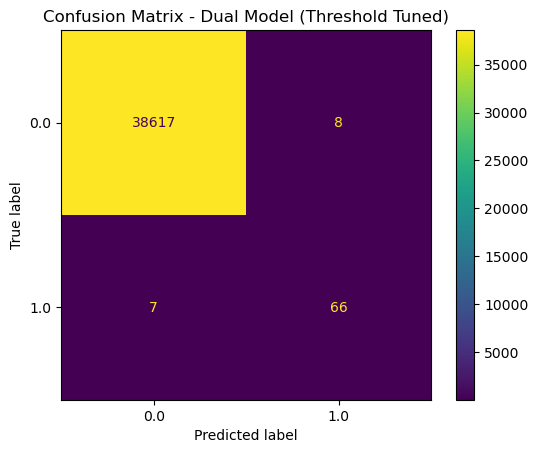

In [53]:

# Evaluation
print(classification_report(y_test, final_preds))
print(confusion_matrix(y_test, final_preds))

ConfusionMatrixDisplay.from_predictions(y_test, final_preds)
plt.title("Confusion Matrix - Dual Model (Threshold Tuned)")
plt.show()

In [57]:
# For interpreting Overfitting

In [58]:
# Predict on training data for both models
train_preds_lr = model_lr.predict(x_train_res)
train_preds_xgb = model_xgb.predict(x_train)

In [59]:
from sklearn.metrics import classification_report

print("🔹 Logistic Regression - Training Performance")
print(classification_report(y_train_res, train_preds_lr))

print("🔹 XGBoosting - Training Performance")
print(classification_report(y_train, train_preds_xgb))

🔹 Logistic Regression - Training Performance
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94    154501
         1.0       0.97      0.90      0.93    154501

    accuracy                           0.94    309002
   macro avg       0.94      0.94      0.94    309002
weighted avg       0.94      0.94      0.94    309002

🔹 XGBoosting - Training Performance
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    154501
         1.0       0.95      1.00      0.97       290

    accuracy                           1.00    154791
   macro avg       0.98      1.00      0.99    154791
weighted avg       1.00      1.00      1.00    154791



In [60]:
print("🔹 Final Dual Model - Test Performance")
print(classification_report(y_test, final_preds))

🔹 Final Dual Model - Test Performance
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38625
         1.0       0.89      0.90      0.90        73

    accuracy                           1.00     38698
   macro avg       0.95      0.95      0.95     38698
weighted avg       1.00      1.00      1.00     38698



## Cross Validation

In [63]:
# lOGISTIC rEGRESSION

from sklearn.model_selection import cross_val_score, StratifiedKFold

In [64]:
stratitied_Kfold_train= cross_val_score(LogisticRegression(), x_train_res,y_train_res, cv=StratifiedKFold(n_splits=20), scoring='f1')

In [65]:
stratitied_Kfold_train.sort()

In [66]:
stratitied_Kfold_train*100

array([93.1025192 , 93.16895715, 93.1942107 , 93.23531395, 93.2388664 ,
       93.25169885, 93.2561583 , 93.31173652, 93.32616439, 93.33512497,
       93.39230666, 93.40504202, 93.41768744, 93.42025674, 93.49494949,
       93.51764864, 93.58708035, 93.66986642, 93.67939753, 93.68449342])

In [68]:
stratitied_Kfold_test= cross_val_score(LogisticRegression(), x_test,y_test, cv=StratifiedKFold(n_splits=20), scoring='f1')

In [69]:
stratitied_Kfold_test.sort()

In [70]:
stratitied_Kfold_test*100

array([  0.        ,  40.        ,  50.        ,  50.        ,
        57.14285714,  57.14285714,  66.66666667,  66.66666667,
        66.66666667,  75.        ,  75.        ,  75.        ,
        80.        ,  85.71428571,  85.71428571,  85.71428571,
        85.71428571,  85.71428571,  85.71428571, 100.        ])

---
| Model                   | Training Perf    | Test Perf       | Comment                                   |
| ----------------------- | ---------------- | --------------- | ----------------------------------------- |
| **Logistic Regression** | \~94% F1 (SMOTE) | Variable        | Good, but unstable on imbalanced test set |
| **Random Forest**       | 100% train F1    | 91%–96% test F1 | Likely overfitting                        |

---

In [73]:
def tune_dual_thresholds(lr, xgb, X_val, y_val, t1_grid, t2_grid, metric='f1'):
    lr_p = lr.predict_proba(X_val)[:,1]
    xgb_p = xgb.predict_proba(X_val)[:,1]
    best = {'t1':0.5, 't2':0.5, 'metric':-1}
    for t1 in t1_grid:
        suspicious = lr_p >= t1
        # if none suspicious, final preds are zeros
        for t2 in t2_grid:
            final = np.zeros_like(y_val)
            if suspicious.any():
                final[suspicious] = (xgb_p[suspicious] >= t2).astype(int)
            # choose metric
            if metric == 'f1':
                val = f1_score(y_val, final)
            elif metric == 'recall':
                val = recall_score(y_val, final)
            else:
                val = f1_score(y_val, final)
            if val > best['metric']:
                best = {'t1':t1, 't2':t2, 'metric':val}
    return best

t1_grid = np.linspace(0.05, 0.5, 10)  # LR threshold must be low-ish to be aggressive
t2_grid = np.linspace(0.1, 0.9, 17)
best = tune_dual_thresholds(model_lr, model_xgb, x_test, y_test, t1_grid, t2_grid, metric='f1')
print(best)

{'t1': 0.05, 't2': 0.45000000000000007, 'metric': 0.8979591836734694}


In [75]:
# Lets do Hyperparameter Tuning:

In [76]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
# import pandas as pd

# scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])

# # Base model
# xgb_model = xgb.XGBClassifier(
#     objective='binary:logistic',
#     eval_metric='logloss',
#     use_label_encoder=False,
#     scale_pos_weight=scale_pos_weight,
#     random_state=42
# )

# # Parameter grid
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'gamma': [0, 0.1, 0.3]
# }

# # Grid search with F1 score (important for fraud detection)
# grid_search = GridSearchCV(
#     estimator=xgb_model,
#     param_grid=param_grid,
#     scoring=make_scorer(f1_score),
#     cv=3,
#     verbose=2,
#     n_jobs=-1
# )

# # Run search
# grid_search.fit(x_train, y_train)

# # Best params & score
# print("Best Parameters:", grid_search.best_params_)
# print("Best F1 Score:", grid_search.best_score_)

In [77]:

# # Train best model on full train set
# best_xgb = grid_search.best_estimator_
# best_xgb.fit(x_train, y_train)

# # Predictions
# y_pred = best_xgb.predict(x_test)
# y_pred_proba = best_xgb.predict_proba(x_test)[:, 1]

# # Evaluation
# from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
# print("Recall:", recall_score(y_test, y_pred))
# print("F1 Score:", f1_score(y_test, y_pred))
# print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

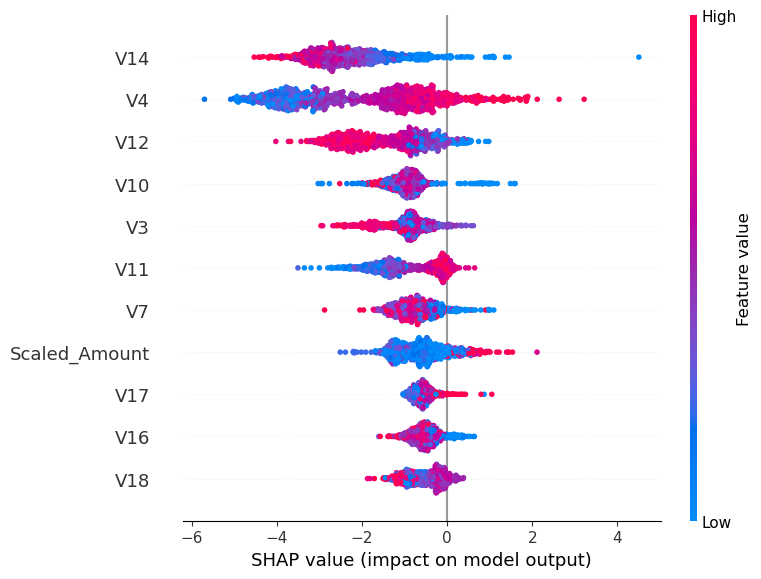

In [129]:
import shap
# TreeExplainer is fast for tree models
xgb_explainer = shap.TreeExplainer(model_xgb)

# Global summary (sample for speed)
X_sample = x_test.sample(min(1000, len(x_test)), random_state=42)
shap_values = xgb_explainer.shap_values(X_sample)
shap.summary_plot(shap_values, X_sample)  # global importance


In [130]:
def top_k_shap_for_row(xgb_explainer, X_row, k=4):
    sv = xgb_explainer.shap_values(X_row.values.reshape(1, -1))[0]
    contrib = pd.Series(sv, index=X_row.index).abs().sort_values(ascending=False)
    top = contrib.head(k).index.tolist()
    return [(f, float(sv[X_row.index.get_loc(f)])) for f in top]

# Example: explain the i-th alert
i = np.where(final_preds == 1)[0][0]
print(top_k_shap_for_row(xgb_explainer, x_test.iloc[i], k=4))

[('V14', 4.353489875793457), ('V4', 2.171511173248291), ('V10', 1.480610966682434), ('V7', 0.9451987147331238)]


In [131]:
lr_coefs = pd.Series(model_lr.coef_[0], index=x_train.columns)
lr_coefs_abs = lr_coefs.abs().sort_values(ascending=False)
print(lr_coefs_abs.head(10))  # globally most influential

V14              0.887684
V4               0.794563
V12              0.595292
V10              0.308343
V16              0.229531
V11              0.108659
V17              0.100183
V3               0.069078
V18              0.039168
Scaled_Amount    0.031900
dtype: float64


In [135]:
def tune_dual_thresholds_on_window(lr, xgb, X_val, y_val, t1_grid, t2_grid,
                                   metric='f1', min_precision=None):
    from sklearn.metrics import f1_score, precision_score, recall_score
    p1 = lr.predict_proba(X_val)[:,1]
    p2 = xgb.predict_proba(X_val)[:,1]
    best = {'t1': None, 't2': None, 'score': -1, 'precision': None, 'recall': None}
    for t1 in t1_grid:
        for t2 in t2_grid:
            preds = ((p1 >= t1) & (p2 >= t2)).astype(int)
            prec = precision_score(y_val, preds, zero_division=0)
            rec  = recall_score(y_val, preds, zero_division=0)
            if metric == 'f1':
                scr = (2*prec*rec)/(prec+rec) if (prec+rec)>0 else 0
            elif metric == 'recall':
                scr = rec
            elif metric == 'precision':
                scr = prec
            else:
                scr = (2*prec*rec)/(prec+rec) if (prec+rec)>0 else 0
            if (min_precision is None or prec >= min_precision) and scr > best['score']:
                best = {'t1': t1, 't2': t2, 'score': scr, 'precision': prec, 'recall': rec}
    return best

# Example grids & call (weekly job)
t1_grid = np.linspace(0.02, 0.3, 15)
t2_grid = np.linspace(0.2, 0.8, 13)
best = tune_dual_thresholds_on_window(model_lr, model_xgb, x_test, y_test,
                                      t1_grid, t2_grid, metric='f1', min_precision=0.8)
print(best)


{'t1': 0.02, 't2': 0.45000000000000007, 'score': 0.8979591836734694, 'precision': 0.8918918918918919, 'recall': 0.9041095890410958}


In [137]:
from sklearn.metrics import confusion_matrix

def best_threshold_by_cost(probs, y_true, cost_fn, cost_fp):
    best = {'t':0.5, 'cost':1e18}
    for t in np.linspace(0.01, 0.99, 99):
        preds = (probs >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, preds).ravel()
        cost = fp*cost_fp + fn*cost_fn
        if cost < best['cost']:
            best = {'t': t, 'cost': cost, 'fp': int(fp), 'fn': int(fn)}
    return best

# For dual model, treat the intersection as the final prob rule (or sweep (t1,t2) and compute cost)

In [139]:
def dual_predict(model_lr, model_xgb, X, t1, t2, return_probs=False):
    p1 = model_lr.predict_proba(X)[:,1]
    p2 = model_xgb.predict_proba(X)[:,1]
    preds = ((p1 >= t1) & (p2 >= t2)).astype(int)
    if return_probs:
        # You can also log the individual model probs
        return preds, p1, p2
    return preds

In [141]:
final_preds, lr_p, xgb_p = dual_predict(model_lr, model_xgb, x_test, t1=0.05, t2=0.45, return_probs=True)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, final_preds))
print(confusion_matrix(y_test, final_preds))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38625
         1.0       0.89      0.90      0.90        73

    accuracy                           1.00     38698
   macro avg       0.95      0.95      0.95     38698
weighted avg       1.00      1.00      1.00     38698

[[38617     8]
 [    7    66]]


In [145]:
# Save file 

In [147]:
import joblib

In [151]:
joblib.dump(model_lr, "model_lr.pkl")

['model_lr.pkl']